# Akanksha Patankar

# The Spark Foundation- Task 5

# Perform EDA on Indian Premier League

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Dataset 

In [2]:
matches = pd.read_csv("matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
matches.shape

(756, 18)

In [7]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [20]:
# dropping the umpire columns to get rid of null values
matches= matches.drop(['umpire3'],axis=1)

In [22]:
#the total no of rows and columns
print('The Total no of rows and columns in matches dataset is', matches.shape)

The Total no of rows and columns in matches dataset is (756, 16)


## Total Matches Played= 756

In [23]:
len(matches['season'].unique())

12

## Total seasons played= 12

In [24]:
pd.concat([matches['team1'],matches['team2']]).unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

## Total Teams=15 

# Winning Teams

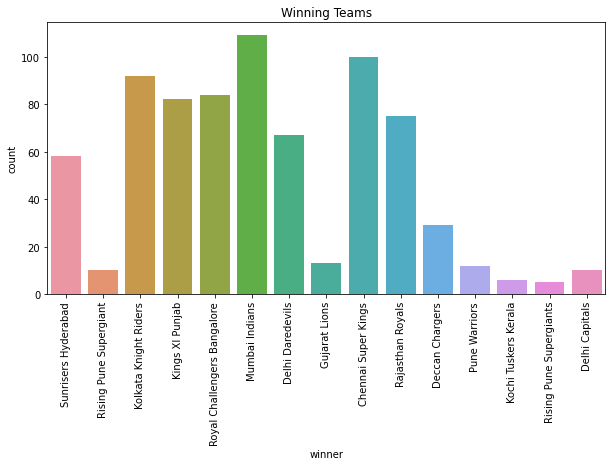

In [26]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'winner', data = matches)
plt.title('Winning Teams')
plt.xticks(rotation = 90);


## Win by Runs

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='winner', ylabel='win_by_runs'>

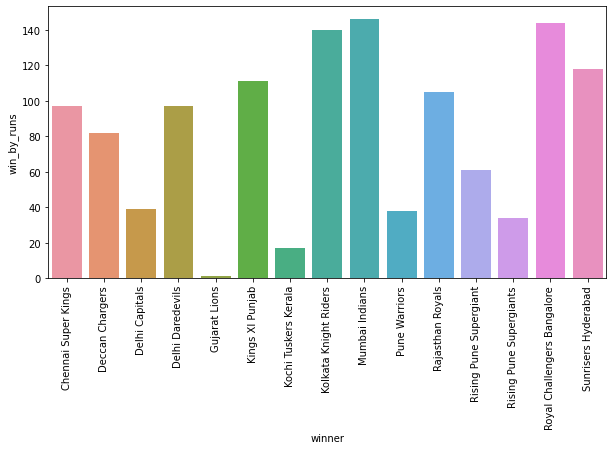

In [27]:
win_max = matches.groupby(['winner'],as_index=False)['win_by_runs'].max()
plt.subplots(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(win_max['winner'],win_max['win_by_runs'])

## The above graphs clearly shows Mumbai Indians is the team with most wins.

## Man of the Match Winners

In [28]:
matches['player_of_match'].value_counts()[0:5]

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'CH Gayle'),
  Text(1, 0, 'AB de Villiers'),
  Text(2, 0, 'RG Sharma'),
  Text(3, 0, 'MS Dhoni'),
  Text(4, 0, 'DA Warner'),
  Text(5, 0, 'YK Pathan'),
  Text(6, 0, 'SR Watson'),
  Text(7, 0, 'SK Raina'),
  Text(8, 0, 'G Gambhir'),
  Text(9, 0, 'V Kohli')])

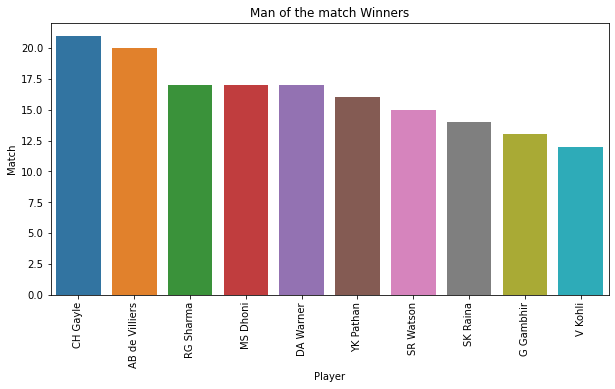

In [29]:
plt.figure(figsize = (10,5))
sns.barplot(x= matches.player_of_match.value_counts()[:10].index, y= matches.player_of_match.value_counts()[:10])
plt.title('Man of the match Winners')
plt.xlabel('Player')
plt.ylabel('Match')
plt.xticks(rotation = 90)

## Chris Gayle and Ab de Villers are the best players

## Number of matches in each season

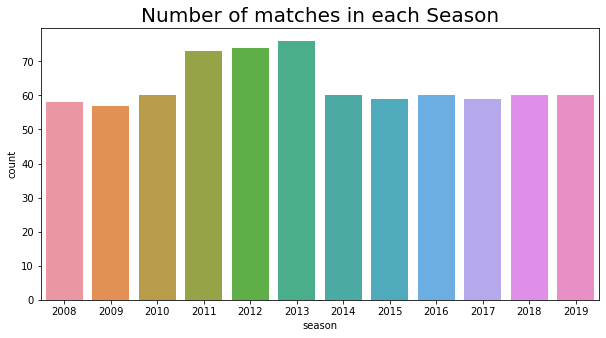

In [30]:
plt.subplots(figsize=(10,5))
sns.countplot(x = matches['season'].sort_values())
plt.title('Number of matches in each Season', fontsize = 20)
plt.show()

### Toss winners

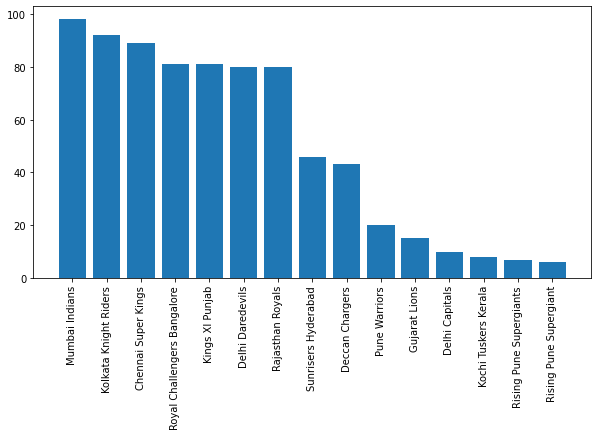

In [31]:
plt.figure(figsize=(10,5))
plt.bar(list(matches['toss_winner'].value_counts().keys()),list(matches['toss_winner'].value_counts()))
plt.xticks(rotation = 90)
plt.show()

### Comparing the Toss Decisions

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


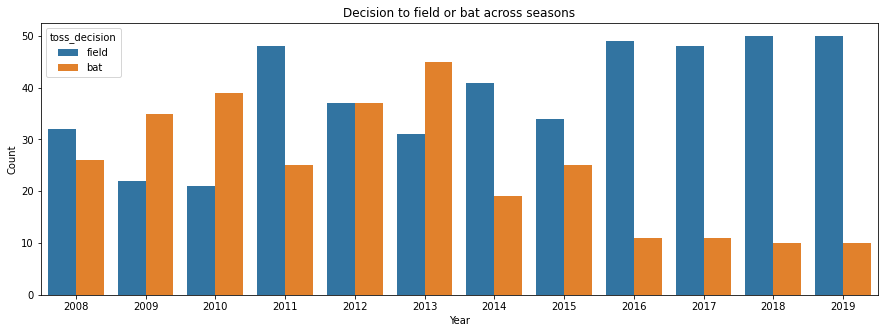

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(matches['season'].sort_values(), hue = matches['toss_decision'])
plt.title("Decision to field or bat across seasons")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

### When a team wins after batting on first position

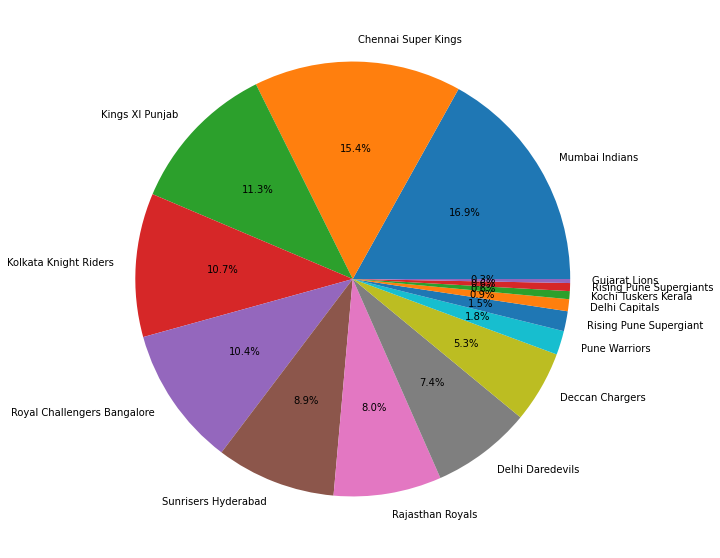

In [33]:
batting_first = matches[matches['win_by_runs']!=0]
plt.figure(figsize=(10,10))
plt.pie(list(batting_first['winner'].value_counts()), labels=list(batting_first['winner'].value_counts().keys())
        ,autopct='%0.1f%%')
plt.show()

### When a team wins after batting on second position

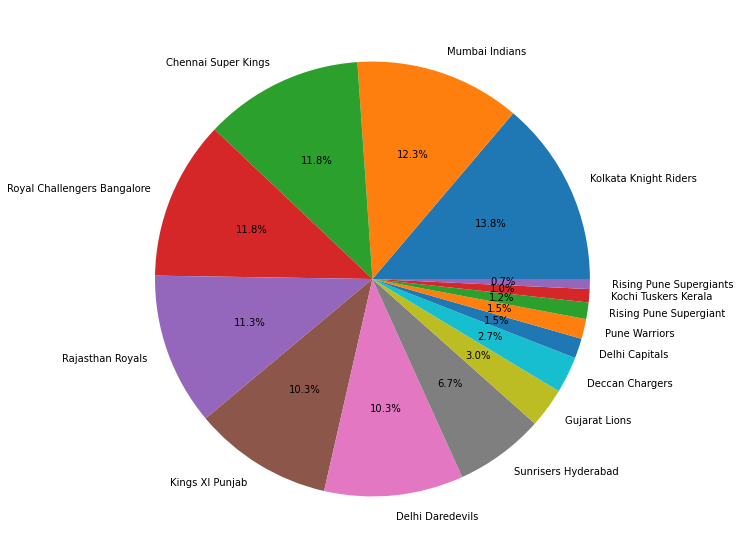

In [34]:
batting_second = matches[matches['win_by_wickets']!=0]
plt.figure(figsize = (10,10))
plt.pie(list(batting_second['winner'].value_counts()), labels=list(batting_second['winner'].value_counts().keys())
        ,autopct = '%0.1f%%')
plt.show()


###  Match Venues

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'Eden Gardens'),
  Text(1, 0, 'Wankhede Stadium'),
  Text(2, 0, 'M Chinnaswamy Stadium'),
  Text(3, 0, 'Feroz Shah Kotla'),
  Text(4, 0, 'Rajiv Gandhi International Stadium, Uppal'),
  Text(5, 0, 'MA Chidambaram Stadium, Chepauk'),
  Text(6, 0, 'Sawai Mansingh Stadium'),
  Text(7, 0, 'Punjab Cricket Association Stadium, Mohali'),
  Text(8, 0, 'Maharashtra Cricket Association Stadium'),
  Text(9, 0, 'Subrata Roy Sahara Stadium'),
  Text(10, 0, 'Dr DY Patil Sports Academy'),
  Text(11, 0, 'Kingsmead'),
  Text(12, 0, 'Punjab Cricket Association IS Bindra Stadium, Mohali'),
  Text(13, 0, 'SuperSport Park'),
  Text(14, 0, 'Sardar Patel Stadium, Motera'),
  Text(15, 0, 'Brabourne Stadium'),
  Text(16, 0, 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'),
  Text(17, 0, 'Saurashtra Cricket

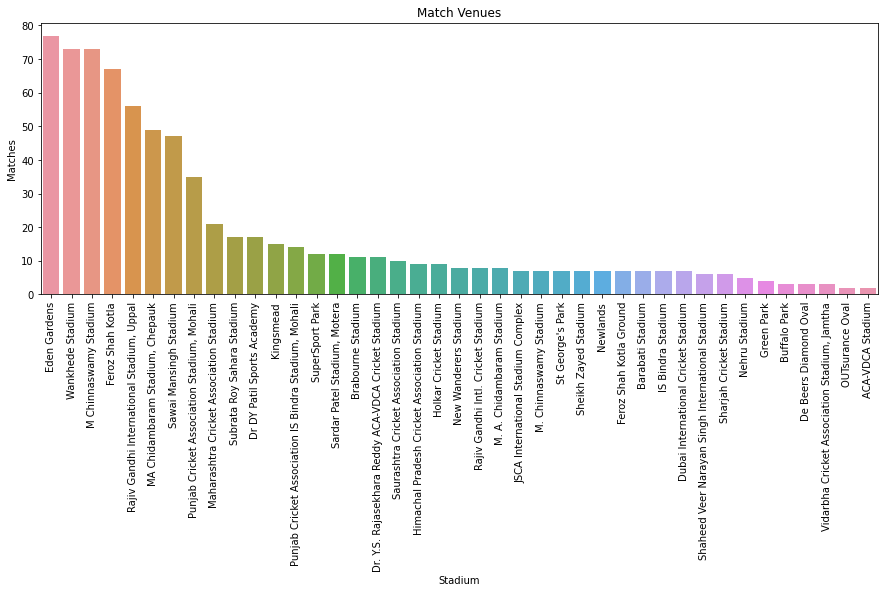

In [35]:
plt.subplots(figsize=(15,5))
sns.countplot(x ='venue',data = matches,order = matches['venue'].value_counts().index)
plt.title('Match Venues')
plt.xlabel('Stadium')
plt.ylabel('Matches')
plt.xticks(rotation = 90)

### Eden Garden is the most popular venue

## Analysis of deliveries dataset

In [46]:
dlvr= pd.read_csv('deliveries.csv')

In [47]:
print('The Total no of rows and columns in deliveries dataset is ', dlvr.shape)

The Total no of rows and columns in deliveries dataset is  (179078, 21)


In [48]:
# Total matches where Super over was and wasn't played
dlvr['is_super_over'].value_counts()

0    178997
1        81
Name: is_super_over, dtype: int64

In [41]:
# total overall runs given by Extra
sum(dlvr['extra_runs'])

12004

In [49]:
# Total runs given by no balls
sum(dlvr['noball_runs'])


749

In [51]:
# Total runs given by penalty
sum(dlvr['penalty_runs'])


10

In [52]:
# Total soft-dissmisal of players over the years
sum(dlvr['player_dismissed'].value_counts())

8834

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'caught'),
  Text(1, 0, 'bowled'),
  Text(2, 0, 'run out'),
  Text(3, 0, 'lbw'),
  Text(4, 0, 'caught and bowled'),
  Text(5, 0, 'stumped'),
  Text(6, 0, 'retired hurt'),
  Text(7, 0, 'hit wicket'),
  Text(8, 0, 'obstructing the field')])

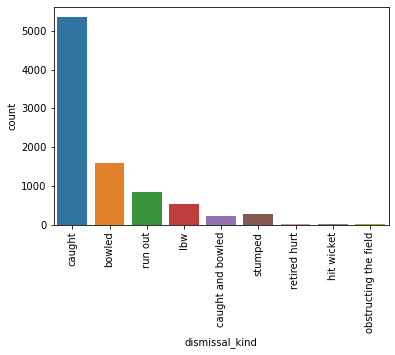

In [53]:
# kinds of dismissal
sns.countplot(x = dlvr['dismissal_kind'], data = dlvr)
plt.xticks(rotation = 90)

## Conclusion:

### 1. Most successful Teams : Mumbai Indians and Chennai Super Kings

### 2. Best players to bid for: Chris Gayle and Ab de Villers. 

### 3. There are many factors on which the win depends: winning a toss, opt field or bat etc.